# 01. Importing libraries and data

## Importing libraries

In [1]:
# Import libraries
import warnings
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from pandas.core.common import SettingWithCopyWarning
from scipy.stats import norm

## Importing data

In [2]:
# Define csv path
path = r'C:\Users\lucav\Desktop\Instacart Basket Analysis'

In [3]:
# Import data from 'orders_products_customers_merged.pkl'
warnings.simplefilter(action='ignore', category=FutureWarning) # Added to ignore warnings
df_ords_prods_cus = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_merged.pkl'))

# 02. Creating charts

## Bar chart

<AxesSubplot:>

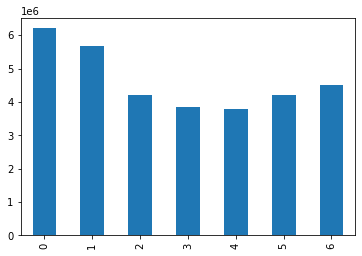

In [4]:
# Create a bar chart for 'day_of_week' column sorted by 'day_of_week'
df_ords_prods_cus['day_of_week'].value_counts().sort_index().plot.bar()

## Histogram

<AxesSubplot:ylabel='Frequency'>

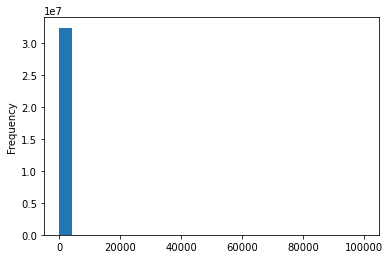

In [5]:
# Create a histogram of the 'prices' column
df_ords_prods_cus['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

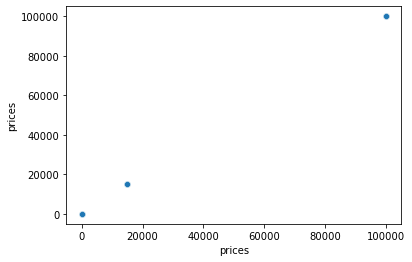

In [6]:
# Create a scatterplot of the 'prices' column
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_cus)

In [7]:
# Determine whether there are any values in the 'prices' column above 100
df_ords_prods_cus.loc[df_ords_prods_cus['prices'] > 100]

,order_id,user_id,order_number,day_of_week,hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
7805,1435153,1519,26,2,11,6.0,False,21553,15,0,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1066435,1519,32,3,10,5.0,False,21553,28,1,...,Frequent customer,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,1697208,2409,33,1,19,5.0,False,21553,1,0,...,Frequent customer,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
20264,965345,3531,27,2,19,8.0,False,33664,2,0,...,Frequent customer,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
20497,2943740,3793,1,2,9,NaN,True,21553,3,0,...,Regular customer,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,False,33664,2,1,...,Regular customer,NaN,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,1179092,131671,12,4,9,15.0,False,33664,1,0,...,Regular customer,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,1226705,39667,7,2,15,20.0,False,33664,14,0,...,Non-frequent customer,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,3000037,95105,2,4,19,22.0,False,33664,4,0,...,Frequent customer,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880


In [8]:
# Mark values above 100 in the 'prices' column as missing
df_ords_prods_cus.loc[df_ords_prods_cus['prices'] > 100, 'prices'] = np.nan

<AxesSubplot:ylabel='Frequency'>

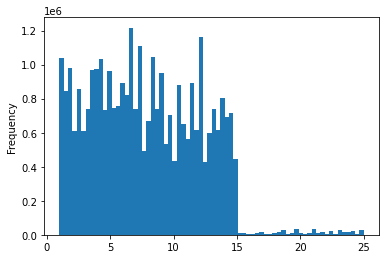

In [9]:
# Create a histogram of the 'prices' column using a high granularity (70 bins)
df_ords_prods_cus['prices'].plot.hist(bins = 70)

## Line chart

In [10]:
# Create a subset by sampling the data based on a 70/30 ratio

# Set the seed to generate a reproducible pattern
np.random.seed(4)

# Store the boolean values in 'dev' list
dev = np.random.rand(len(df_ords_prods_cus)) <= 0.7

# Split 'ords_prods_merge' into two samples
big = df_ords_prods_cus[dev] # The True values in 'dev' are stored in 'big' (70% of the total dataframe)
small = df_ords_prods_cus[~dev] # The False values in 'dev' are stored in 'small' (30% of the total dataframe)

In [11]:
# Verify whether 'big' + 'small' is equal to the total dataframe
len(df_ords_prods_cus) == len(big) + len(small)

True

In [12]:
# Select only 'prices' and 'day_of_week' columns
df_2 = small[['day_of_week','prices']]

<AxesSubplot:xlabel='day_of_week', ylabel='prices'>

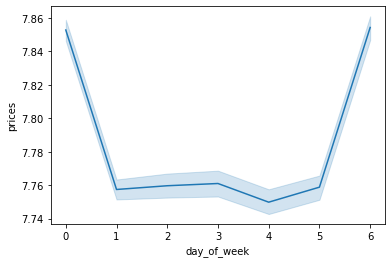

In [13]:
# Create a line chart of 'df_2'
sns.lineplot(data = df_2, x = 'day_of_week',y = 'prices')

# 03. Descriptive findings about sales

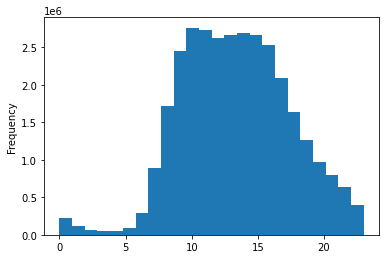

In [14]:
# Create a histogram of the 'hour_of_day' column and store it within the 'hist' object
hist = df_ords_prods_cus['hour_of_day'].plot.hist(bins = 24)

The histogram shows that the most frequent hours in the data set, hence the hours with the most sales, are 9 to 17.

# 04. Distribution of orders among customers in terms of loyalty

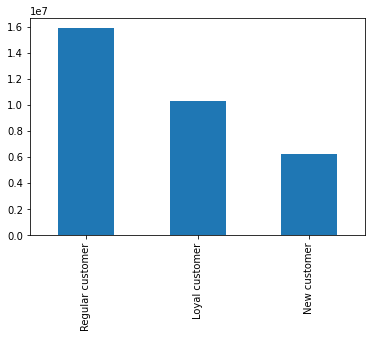

In [15]:
# Create a bar chart for 'loyalty_flag' column and within the 'bar' object
bar = df_ords_prods_cus['loyalty_flag'].value_counts().plot.bar()

The chart shows that the most orders in the data set are placed by regular customers.

# 05. Difference in expenditure depending on the hour of the day

In [16]:
# Create a subset of the 'small' dataframe selecting only 'prices' and 'hour_of_day' columns
df_3 = small[['hour_of_day','prices']]

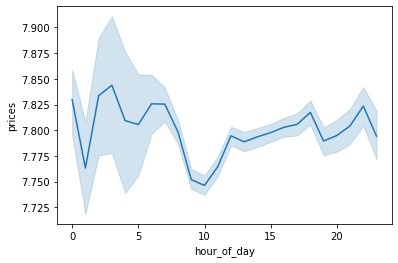

In [17]:
# Create a line chart of 'df_3' and store it within 'line' object
line = sns.lineplot(data = df_3, x = 'hour_of_day', y = 'prices')

The line chart shows that the expenditure varies throughout the day, reaching the maximum late at night (around 22) and early in the morning (around 3), and the minimum at midmorning (around 10).

# 06. Relationship between age and number of dependents

In [18]:
# Create a subset of the 'small' dataframe selecting only 'age' and 'n_dependants' columns
df_4 = small[['age','n_dependants']]

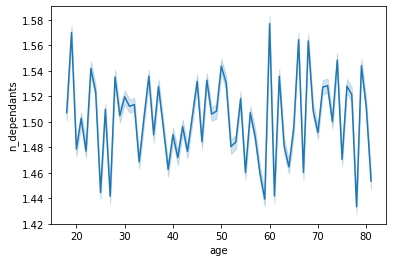

In [19]:
# Create a line chart of 'df_4' and store it within 'line1' object
line1 = sns.lineplot(data = df_4, x = 'age', y = 'n_dependants')

The line chart shows an erratic pattern due to the small y-axis range, thus a further investigation would be necessary in order to glean meaningful insights.

# 07. Relationship between age and spending power (income)

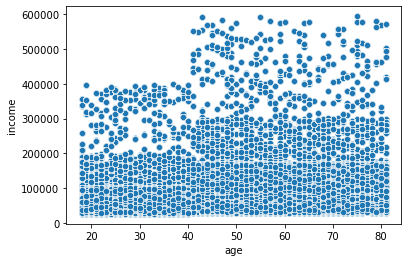

In [20]:
# Create a scatterplot of the 'age' and 'income' columns and store it within 'scatter' object
scatter = sns.scatterplot(x = 'age', y = 'income', data = df_ords_prods_cus)

The scatterplot shows that the spending power (in terms of income) greatly increases past 40 years of age.

# 08. Export visualizations

In [21]:
# Export charts as images (.png)
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hod.png'))
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hod.png'))
line1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))

# Export 'df_ords_prods_cus' as 'orders_products_customers_final.pkl'

In [22]:
df_ords_prods_cus.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers_final.pkl'))